# Airlines Flights Data Analysis & Price Prediction

## Introduction :-

With the rise in air travel, understanding the key drivers behind flight ticket pricing has become crucial for both consumers and the aviation industry. This project begins with a detailed analysis of airline flight data to identify trends, outliers, and relationships between features such as airlines, routes, travel dates, and durations. By cleaning and exploring the dataset, we aim to uncover patterns that influence airfare variability and prepare the data for future machine learning applications.

## 🧩 Problem Statement :-

Airfare pricing is dynamic and influenced by several variables such as airline, number of stops, departure time, duration, and more. For travelers and travel platforms alike, predicting flight prices can provide valuable insights for budgeting and decision-making. This project aims to explore the factors affecting flight prices through data analysis and build a foundation for predictive modeling.

## About the Dataset :-

**FEATURES** : The various features of the cleaned dataset are explained below:

1) **Airline:** The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

2) **Flight:** Flight stores information regarding the plane's flight code. It is a categorical feature.

3) **Source City:** City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) **Departure Time:** This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5) **Stops:** A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6) **Arrival Time:** This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7) **Destination City:** City where the flight will land. It is a categorical feature having 6 unique cities.

8) **Class:** A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9) **Duration:** A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

10) **Days Left:** This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

11) **Price:** Target variable stores information of the ticket price.

## Objectives :-

1) Perform exploratory data analysis (EDA) on airline flight data.
2) Understand the relationship between features like stops, airlines, and duration with ticket prices.
3) Clean and preprocess the dataset for effective analysis.
4) Visualize key insights and trends in the data.
5) Lay the groundwork for building accurate price prediction models in later stages.

## Exploratory Data Analysis (EDA)

### 1) Importing Required Libraries :-

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import warnings
warnings.filterwarnings('ignore') 

### 2) Loading the Data into the DataFrame :-

In [3]:
df = pd.read_csv("airlines_flights_data.csv")
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


### 3) Basic Information :-

In [4]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
df.tail()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [6]:
# Get Statistical summary about the dataset
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


From the above information we can conclude that we have :-
- 8 Categorical Features
- 4 Numerical Features

In [8]:
df.shape

(300153, 12)

From this information we can conclude that we have :- 
- 300153 rows &
- 12 Features

### 4) Checking the null values :-

In [9]:
df.isnull().sum()

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

So we can clearly see that there is no null value in this data. So we don't have to fill the missing values or clean the data

### 5) Dropping the irrelevent columns :-

In [10]:
# Removing the 'index' column
df.drop(columns = 'index' , inplace = True)

### 6) Overview of our cleaned Dataset :-

In [11]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [12]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [13]:
df.tail()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [15]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [16]:
df.shape

(300153, 11)

### 7) Visualization 

#### 7.1) Correlation Matrix :-

Correlation Matrix:
            duration  days_left     price
duration   1.000000  -0.039157  0.204222
days_left -0.039157   1.000000 -0.091949
price      0.204222  -0.091949  1.000000


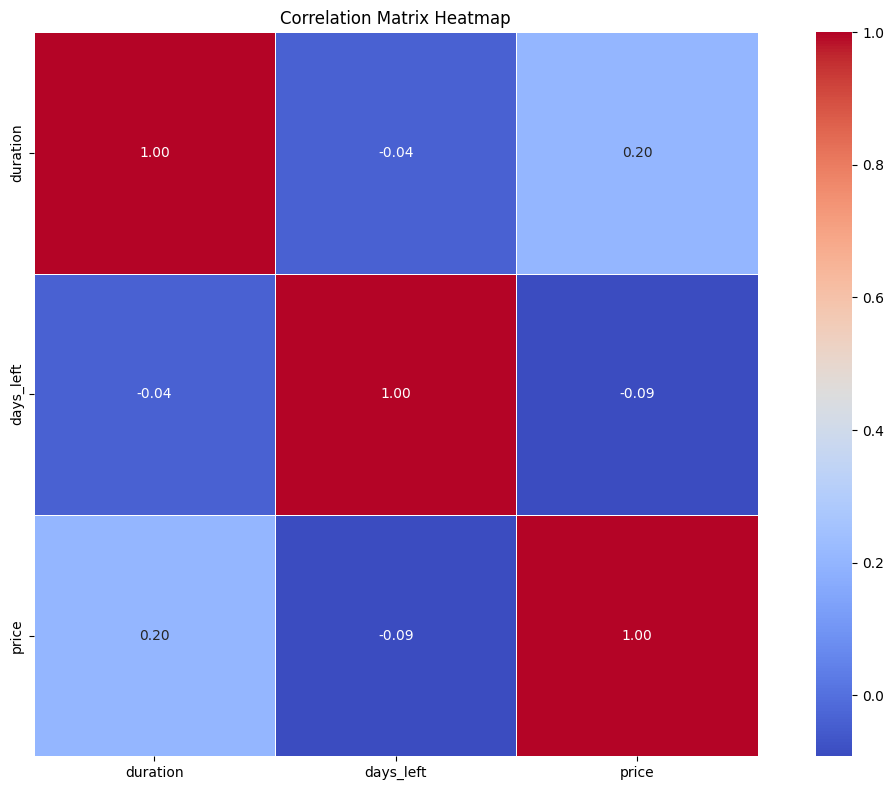

In [17]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Display correlation matrix
print("Correlation Matrix:\n", corr_matrix)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

This heatmap is a quick and intuitive way to visualize the pairwise linear relationships between these three variables. It shows that duration and price have a weak positive correlation, while days_left has a very weak or almost no linear relationship with either duration or price.

#### 7.2) Airlines with thier Frequency :-

In [18]:
# Checking how many Airlines are in the dataset
df['airline'].nunique()

6

In [19]:
# Showing the names of the Airlines in the dataset
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [20]:
# Showing all the Airlines with their frequencies
df['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

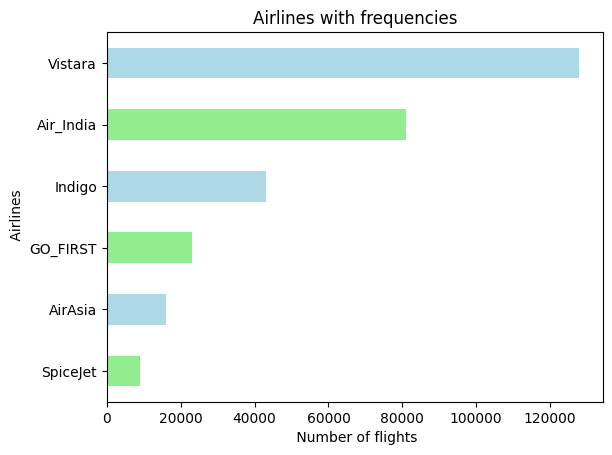

In [21]:
# Showing all the Airlines with their Number of Flights in Horizontal Bar Graph
df['airline'].value_counts(ascending=True).plot.barh( color = ['lightgreen', 'lightblue'])
plt.title("Airlines with frequencies")
plt.xlabel(" Number of flights")
plt.ylabel(" Airlines")
plt.show()

#### 7.3) Bar Graphs representing the Departure Time & Arrival Time

In [22]:
# Checking How many Departure Time for the flights
df['departure_time'].nunique()

6

In [23]:
# Showing the names of the Departure Time
df['departure_time'].unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [24]:
# Showing the Departure Time for the flights
df['departure_time'].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

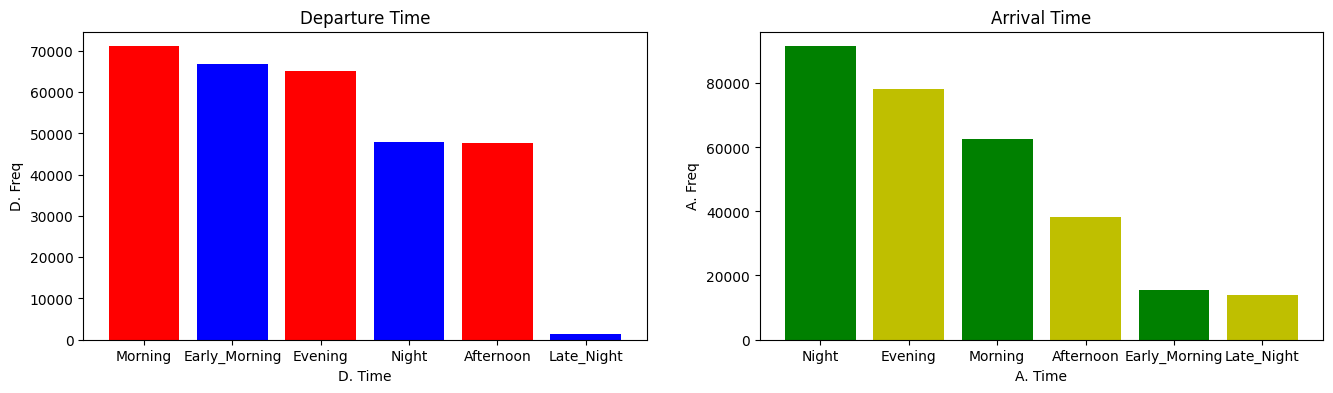

In [25]:
# Showing the Departure Time & Arrival Time for the flights with their counts
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)

plt.bar( df['departure_time'].value_counts().index , df['departure_time'].value_counts().values, color = ['r', 'b'] )
plt.title("Departure Time")
plt.xlabel("D. Time")
plt.ylabel("D. Freq")

plt.subplot(1,2,2)

plt.bar( df['arrival_time'].value_counts().index, df['arrival_time'].value_counts().values, color = ['g', 'y'])
plt.title("Arrival Time")
plt.xlabel("A. Time")
plt.ylabel("A. Freq")

plt.show()

#### 7.4) Bar Graphs representing the Source City & Destination City :-

In [26]:
# Checking how many Source city for the flights
df['source_city'].nunique()

6

In [27]:
# Showing the names of the Source City for the flights
df['source_city'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [28]:
# Showing the Source City of the flights
df['source_city'].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [29]:
# Checking how many Destination city for the flights
df['destination_city'].nunique()

6

In [30]:
# Showing the names of the Destination City of the flights
df['destination_city'].unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [31]:
# Showing the Destination City of the flights
df['destination_city'].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

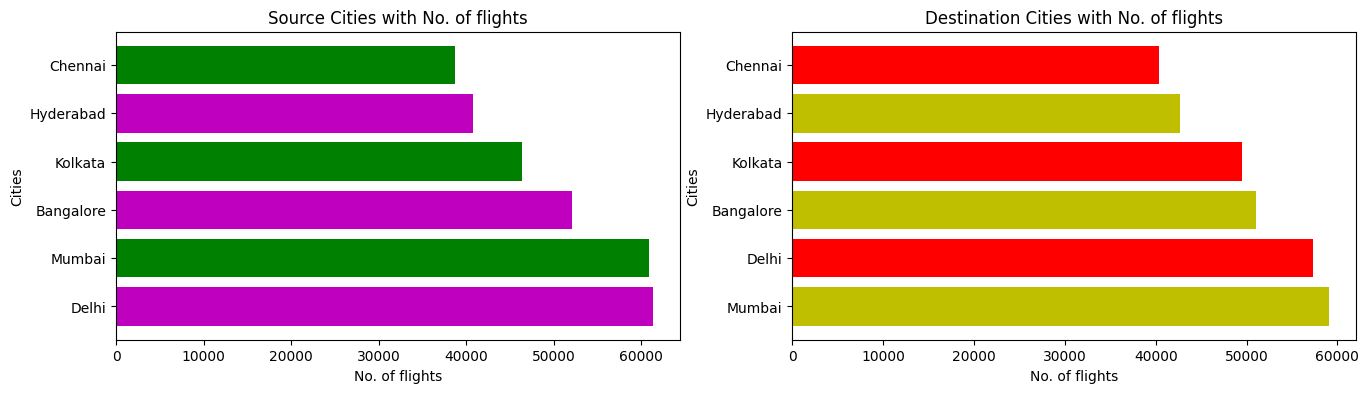

In [32]:
# Showing the Source City & Destination City for the flights with their counts
plt.figure( figsize= (16,4))
plt.subplot(1,2,1)

plt.barh( df['source_city'].value_counts().index , df['source_city'].value_counts().values, color = ['m', 'g'])
plt.title("Source Cities with No. of flights")
plt.ylabel("Cities")
plt.xlabel("No. of flights")

plt.subplot(1,2,2)

plt.barh( df['destination_city'].value_counts().index , df['destination_city'].value_counts().values, color = ['y', 'r'])
plt.title("Destination Cities with No. of flights")
plt.ylabel("Cities")
plt.xlabel("No. of flights")

plt.show()

#### 7.5) Price Variation with Airlines :-

In [33]:
# Grouping the airlines and checking their mean price
df.groupby('airline')['price'].mean()

airline
AirAsia       4091.072742
Air_India    23507.019112
GO_FIRST      5652.007595
Indigo        5324.216303
SpiceJet      6179.278881
Vistara      30396.536302
Name: price, dtype: float64

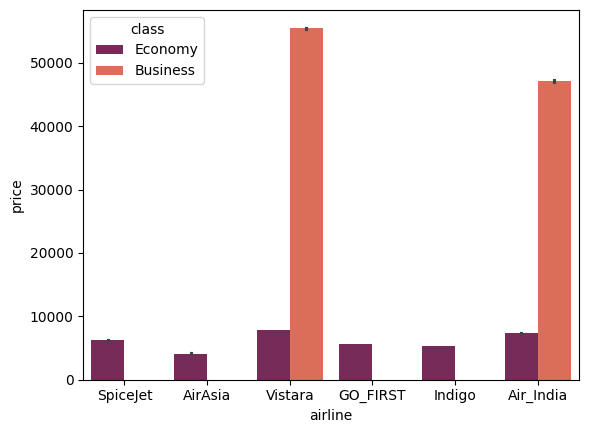

In [34]:
# Drawing a Categorical Plot showing the Mean Ticket Price for each Airline
sns.barplot(df,  x = 'airline', y = 'price', palette = 'rocket', hue = 'class')
plt.show()

#### 7.6) Changes in Ticket price based on the departure time and arrival time :-

In [35]:
# Checking the Mean Ticket Price based on the Departure Times
df.groupby('departure_time')['price'].mean()

departure_time
Afternoon        18179.203331
Early_Morning    20370.676718
Evening          21232.361894
Late_Night        9295.299387
Morning          21630.760254
Night            23062.146808
Name: price, dtype: float64

In [36]:
# Checking the Mean Ticket Price based on the Arrival Times
df.groupby('arrival_time')['price'].mean()

arrival_time
Afternoon        18494.598993
Early_Morning    14993.139521
Evening          23044.371615
Late_Night       11284.906078
Morning          22231.076098
Night            21586.758341
Name: price, dtype: float64

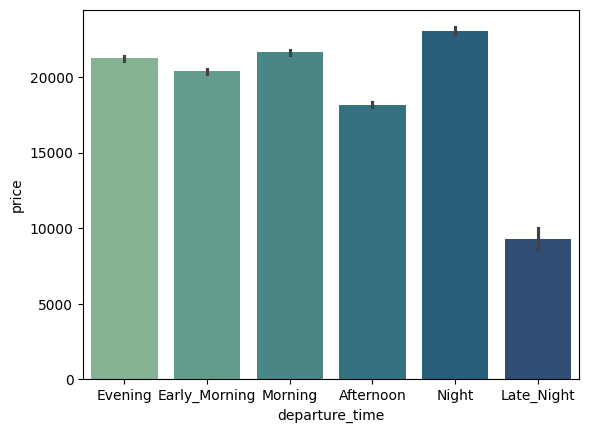

In [37]:
# Departure time vs Price
sns.barplot(df ,  x = 'departure_time', y = 'price' , palette = 'crest')
plt.show()

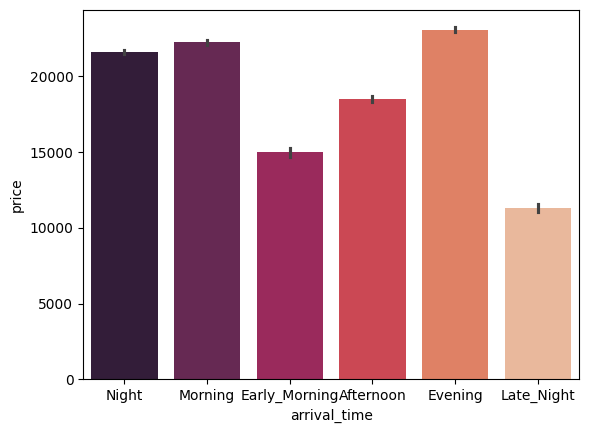

In [38]:
# Arrival Time vs Price
sns.barplot(df ,  x = 'arrival_time', y = 'price' , palette = 'rocket')
plt.show()

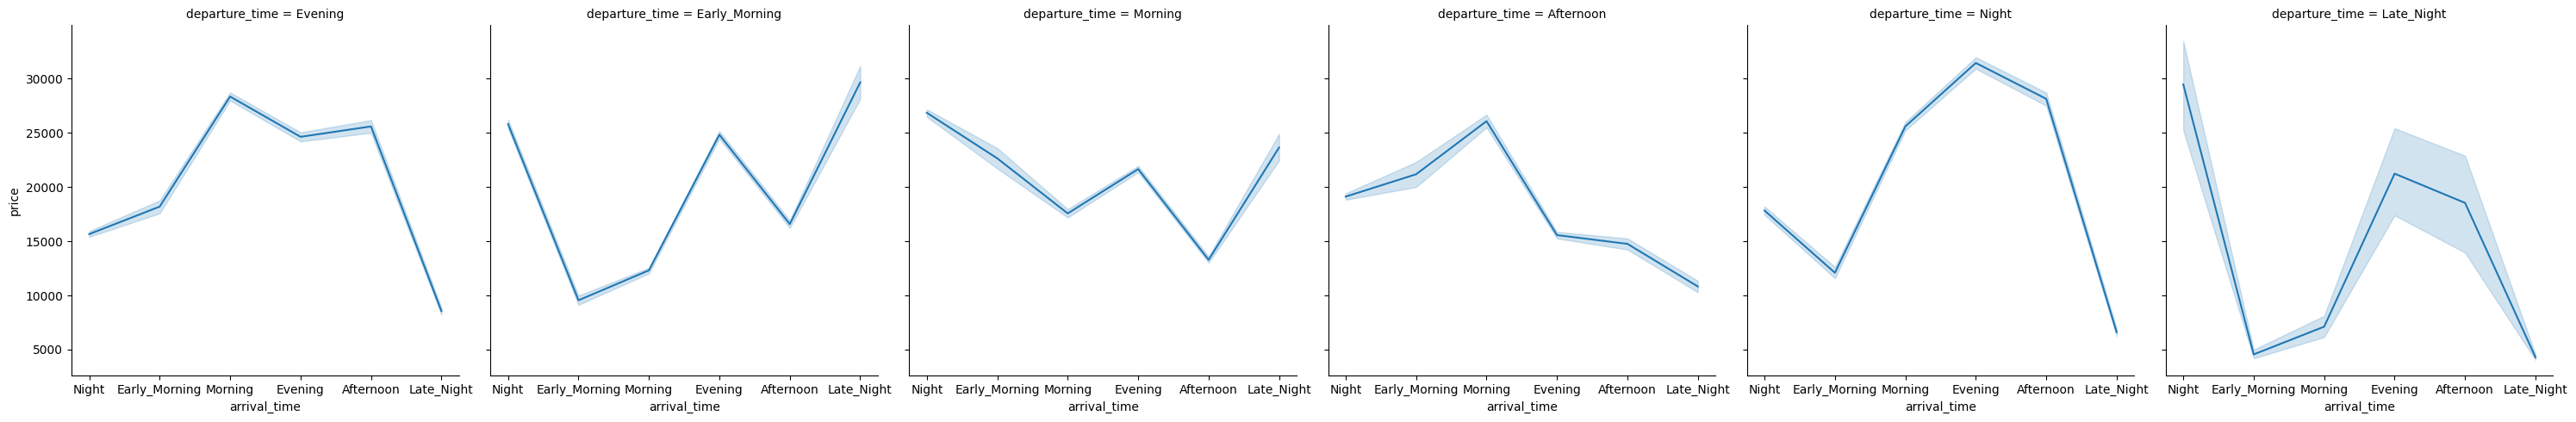

In [39]:
# Variations in Arrival time vs Price based on Departure time
sns.relplot( x = 'arrival_time', y = 'price', data = df, col = "departure_time", kind = 'line')
plt.show()

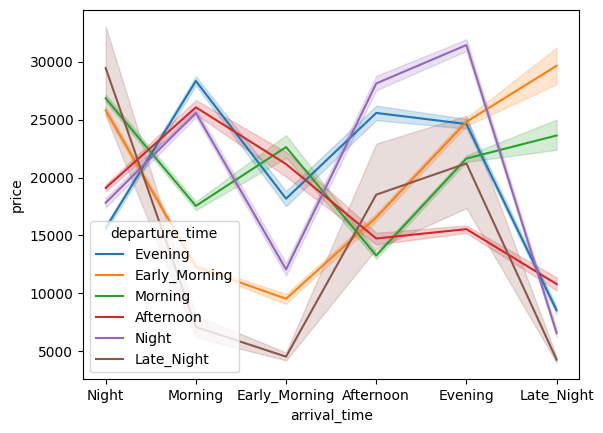

In [40]:
sns.lineplot(df , x = 'arrival_time', y = 'price', hue = 'departure_time')

plt.show()

#### 7.7) Changes in price with the change in Source and Destination :-

In [41]:
# Checking the Mean Ticket Price for each Source City

df.groupby('source_city')['price'].mean()

source_city
Bangalore    21469.460575
Chennai      21995.339871
Delhi        18951.326639
Hyderabad    20155.623879
Kolkata      21746.235679
Mumbai       21483.818839
Name: price, dtype: float64

In [42]:
# Checking the Mean Ticket Price for each Destination City

df.groupby('destination_city')['price'].mean()

destination_city
Bangalore    21593.955784
Chennai      21953.323969
Delhi        18436.767870
Hyderabad    20427.661284
Kolkata      21959.557556
Mumbai       21372.529469
Name: price, dtype: float64

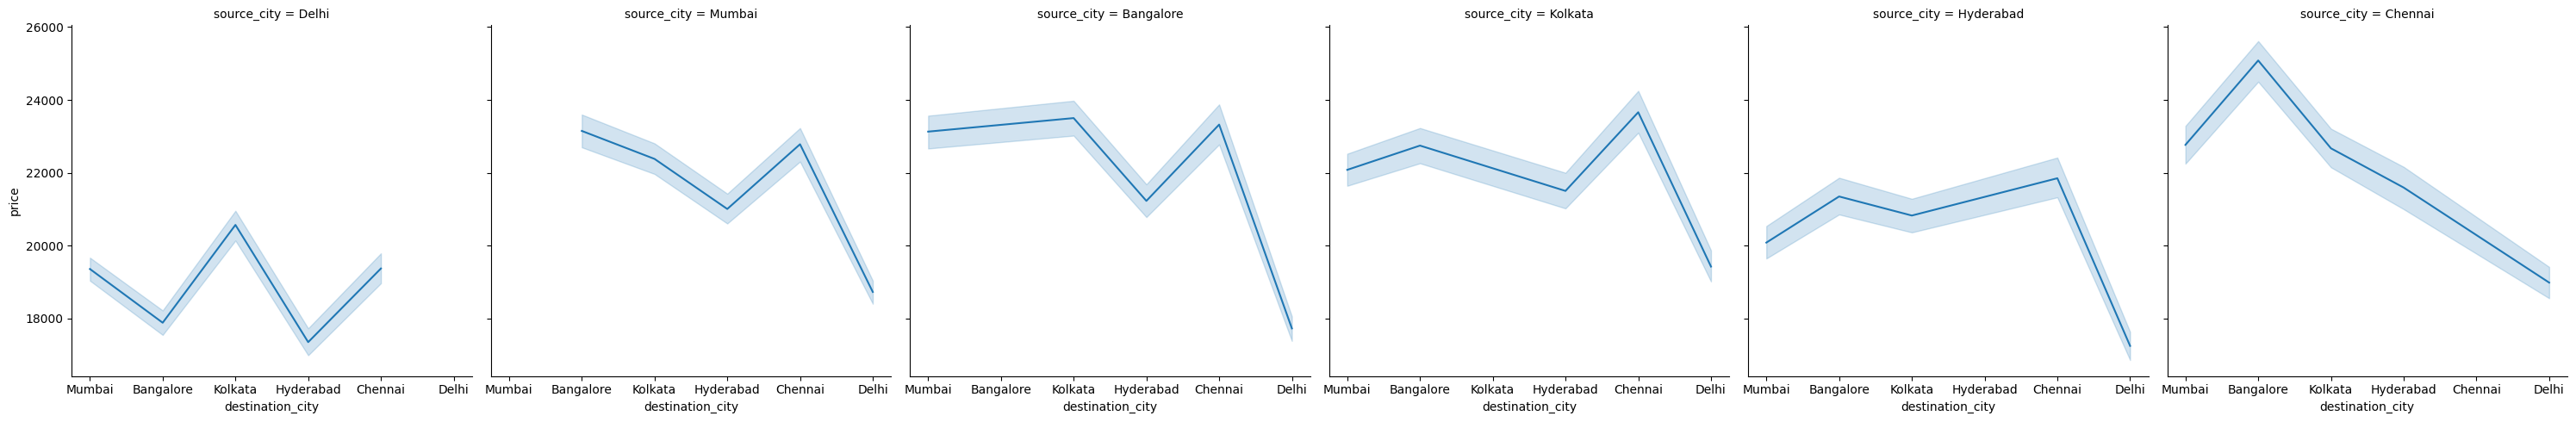

In [43]:
# Variations in Destination City vs Price based on Source City

sns.relplot( x = 'destination_city', y = 'price', data = df, col = "source_city", kind = 'line')
plt.show()

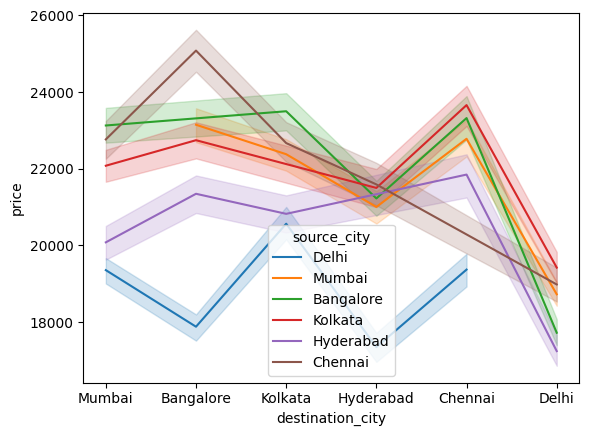

In [44]:
sns.lineplot(df , x = 'destination_city', y = 'price', hue = 'source_city')
plt.show()

#### 7.8) Affected price when tickets are bought in just 1 or 2 days before departure :-

In [45]:
df['days_left'].nunique()

49

In [46]:
df['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [47]:
# Checking the Mean Ticket Price for different days_left
df.groupby('days_left')['price'].mean()

days_left
1     21591.867151
2     30211.299801
3     28976.083569
4     25730.905653
5     26679.773368
6     24856.493902
7     25588.367351
8     24895.883995
9     25726.246072
10    25572.819134
11    22990.656070
12    22505.803322
13    22498.885384
14    22678.002363
15    21952.540852
16    20503.546237
17    20386.353949
18    19987.445168
19    19507.677375
20    19699.983390
21    19430.494058
22    19590.667385
23    19840.913451
24    19803.908896
25    19571.641791
26    19238.290278
27    19950.866195
28    19534.986047
29    19744.653119
30    19567.580834
31    19392.706612
32    19258.135308
33    19306.271739
34    19562.008266
35    19255.652996
36    19517.688444
37    19506.306516
38    19734.912316
39    19262.095556
40    19144.972439
41    19347.440460
42    19154.261659
43    19340.528894
44    19049.080174
45    19199.876307
46    19305.351623
47    18553.272038
48    18998.126851
49    18992.971888
Name: price, dtype: float64

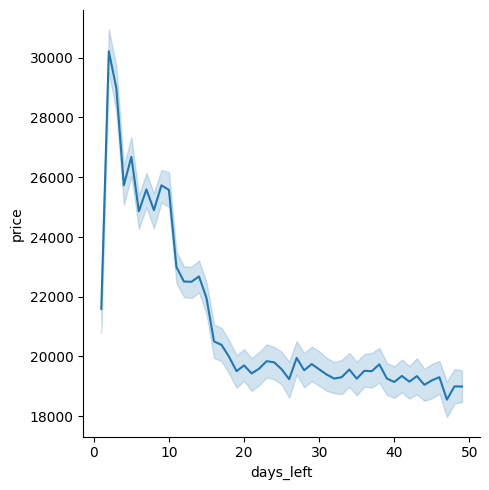

In [48]:
# Line plot between Days left and Price
sns.relplot( y='price', x = 'days_left', kind = 'line', data = df )
plt.show()

#### 7.9) Variation of ticket price between Economy and Business class :-

In [49]:
df['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [50]:
# Filtering out the records with Economy class
x = df[ df['class'] == 'Economy' ]
x

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
206661,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7697
206662,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7709
206663,Vistara,UK-826,Chennai,Afternoon,one,Morning,Hyderabad,Economy,20.58,49,8640
206664,Vistara,UK-822,Chennai,Morning,one,Morning,Hyderabad,Economy,23.33,49,8640


In [51]:
# Checking Mean Price for Economy class tickets
x.price.mean()

np.float64(6572.342383362527)

In [52]:
# Filtering out the records with Business class
y = df[ df['class'] == 'Business' ]
y

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
206666,Air_India,AI-868,Delhi,Evening,zero,Evening,Mumbai,Business,2.00,1,25612
206667,Air_India,AI-624,Delhi,Evening,zero,Night,Mumbai,Business,2.25,1,25612
206668,Air_India,AI-531,Delhi,Evening,one,Night,Mumbai,Business,24.75,1,42220
206669,Air_India,AI-839,Delhi,Night,one,Night,Mumbai,Business,26.50,1,44450
206670,Air_India,AI-544,Delhi,Evening,one,Night,Mumbai,Business,6.67,1,46690
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [53]:
# Checking Mean Price for Business class tickets
y.price.mean()

np.float64(52540.08112357868)

#### 7.10) Average Price of Vistara airline for a flight from Delhi to Hyderabad in Business Class :-

In [54]:
# applying filtering based on multiple conditions
Vistara = df[(df['airline'] == 'Vistara') & (df['source_city'] == 'Delhi') & (df['destination_city'] == 'Hyderabad')
     & (df['class'] == 'Business')]

In [55]:
Vistara

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
219123,Vistara,UK-871,Delhi,Night,zero,Night,Hyderabad,Business,2.33,1,30630
219124,Vistara,UK-879,Delhi,Evening,zero,Evening,Hyderabad,Business,2.25,1,38470
219129,Vistara,UK-955,Delhi,Evening,one,Night,Hyderabad,Business,27.17,1,63513
219130,Vistara,UK-955,Delhi,Evening,one,Afternoon,Hyderabad,Business,18.50,1,65764
219131,Vistara,UK-985,Delhi,Evening,one,Night,Hyderabad,Business,25.08,1,69113
...,...,...,...,...,...,...,...,...,...,...,...
221863,Vistara,UK-963,Delhi,Morning,one,Early_Morning,Hyderabad,Business,23.00,49,53937
221864,Vistara,UK-985,Delhi,Evening,one,Early_Morning,Hyderabad,Business,12.00,49,59537
221865,Vistara,UK-985,Delhi,Evening,one,Afternoon,Hyderabad,Business,16.42,49,59537
221866,Vistara,UK-955,Delhi,Evening,one,Early_Morning,Hyderabad,Business,14.08,49,61889


In [56]:
# Checking the mean price
Vistara['price'].mean()

np.float64(47939.840361445786)

#### 7.11) Univariate Analysis (Individual Features) :- 

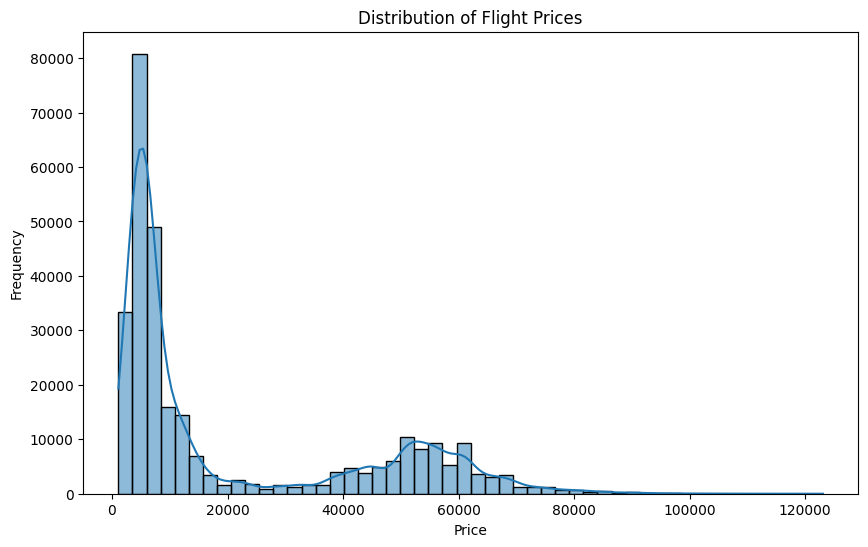

In [57]:
# Distribution of Flight Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

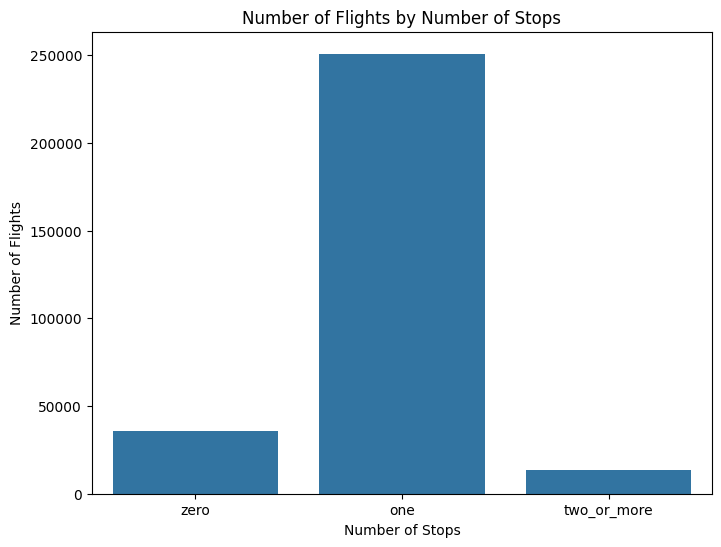

In [58]:
# Number of flights by number of stops
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='stops')
plt.title('Number of Flights by Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Number of Flights')
plt.show()

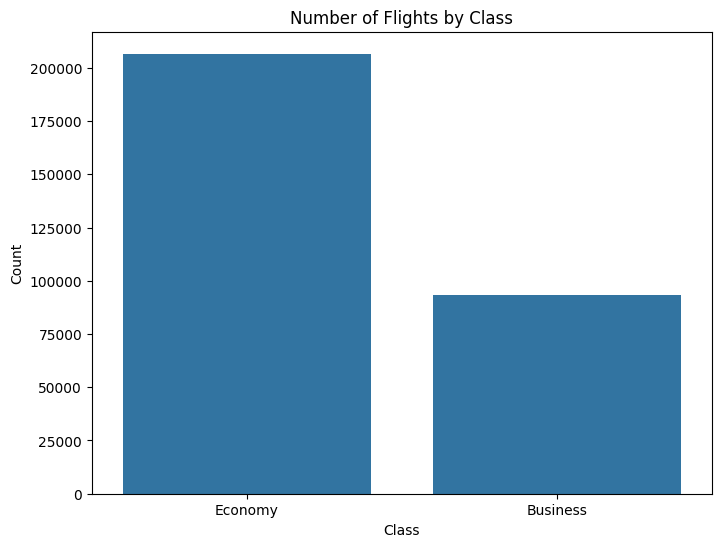

In [59]:
# Number of flights by class
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='class')
plt.title('Number of Flights by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

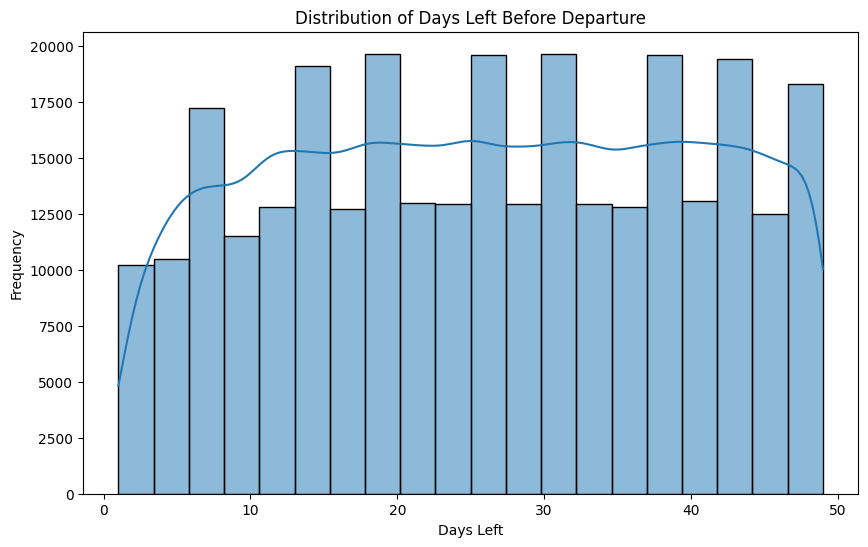

In [60]:
# Distribution of days left before departure
plt.figure(figsize=(10, 6))
sns.histplot(df['days_left'], bins=20, kde=True)
plt.title('Distribution of Days Left Before Departure')
plt.xlabel('Days Left')
plt.ylabel('Frequency')
plt.show()

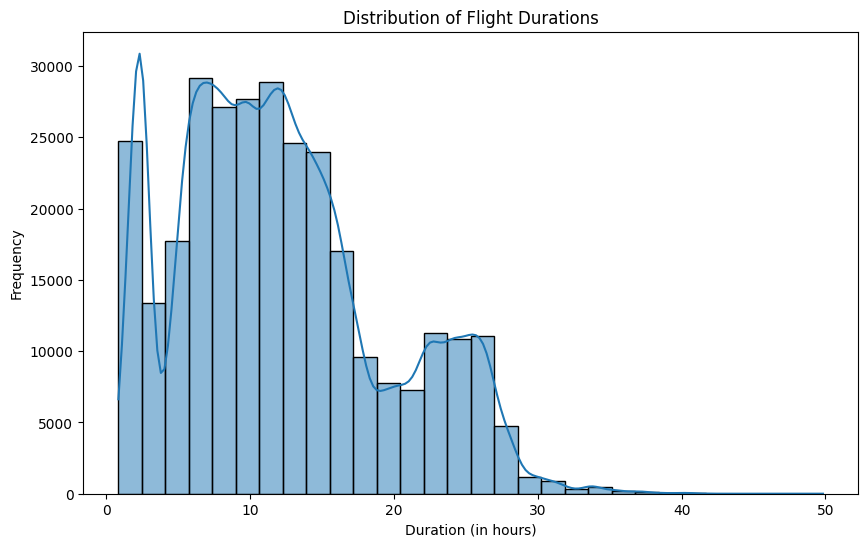

In [61]:
# Distribution of Flight Durations
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'], bins=30, kde=True)
plt.title('Distribution of Flight Durations')
plt.xlabel('Duration (in hours)')
plt.ylabel('Frequency')
plt.show()

#### 7.12) Bivariate Analysis (Relationships) :-

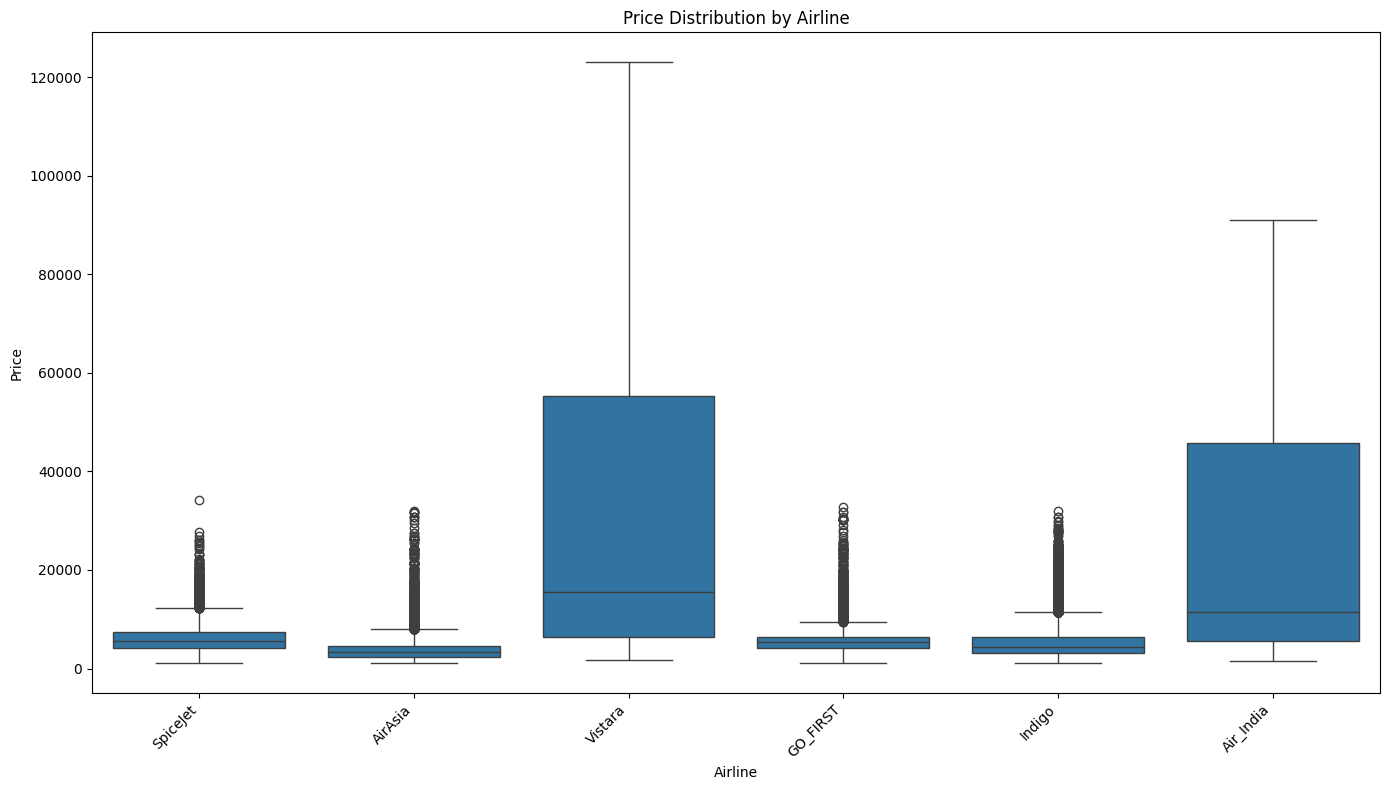

In [62]:
# Boxplot for Price distribution by Airline
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='airline', y='price')
plt.title('Price Distribution by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

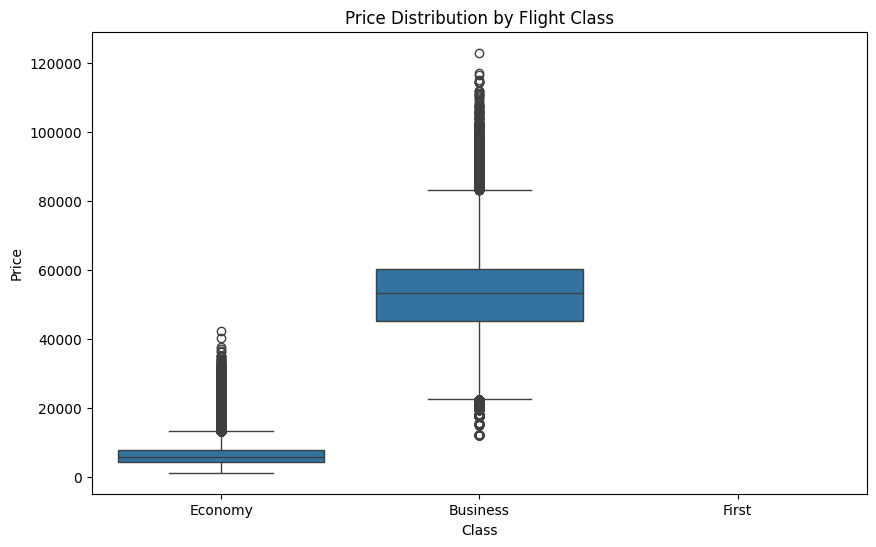

In [63]:
# Boxplot for Price Distribution by Flight Class
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='class', y='price', order=['Economy', 'Business', 'First'])
plt.title('Price Distribution by Flight Class')
plt.xlabel('Class')
plt.ylabel('Price')
plt.show()

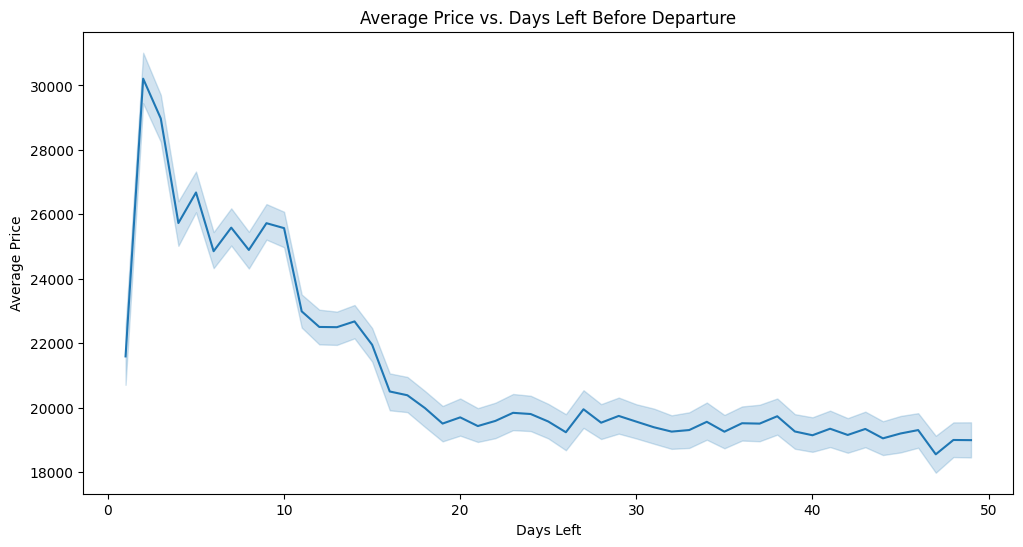

In [64]:
# Average Price vs Days left before Departure
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='days_left', y='price')
plt.title('Average Price vs. Days Left Before Departure')
plt.xlabel('Days Left')
plt.ylabel('Average Price')
plt.show()

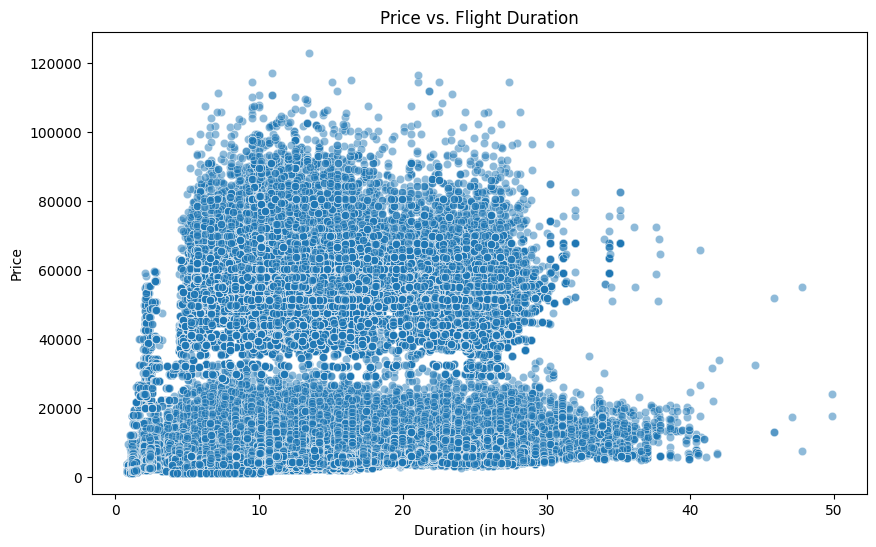

In [65]:
# Scatterplot for Price vs Flight Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='duration', y='price', alpha=0.5)
plt.title('Price vs. Flight Duration')
plt.xlabel('Duration (in hours)')
plt.ylabel('Price')
plt.show()

#### 7.13) Multivariate Analysis (Multiple Features) :-

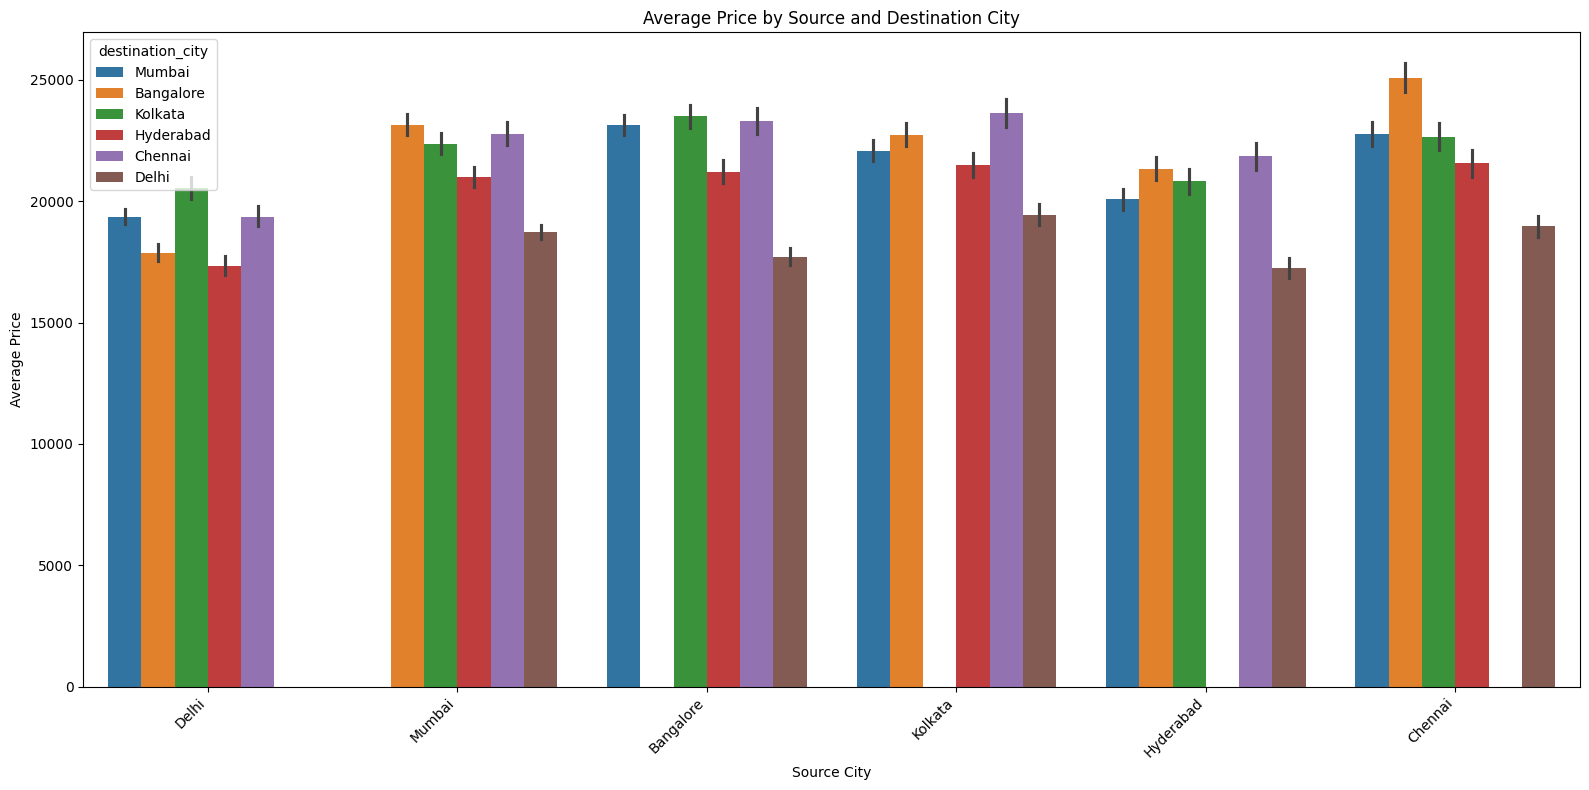

In [66]:
# Average price by Source and Destination City
plt.figure(figsize=(16, 8))
sns.barplot(data=df, x='source_city', y='price', hue='destination_city')
plt.title('Average Price by Source and Destination City')
plt.xlabel('Source City')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 7.14) Advanced Analysis :-

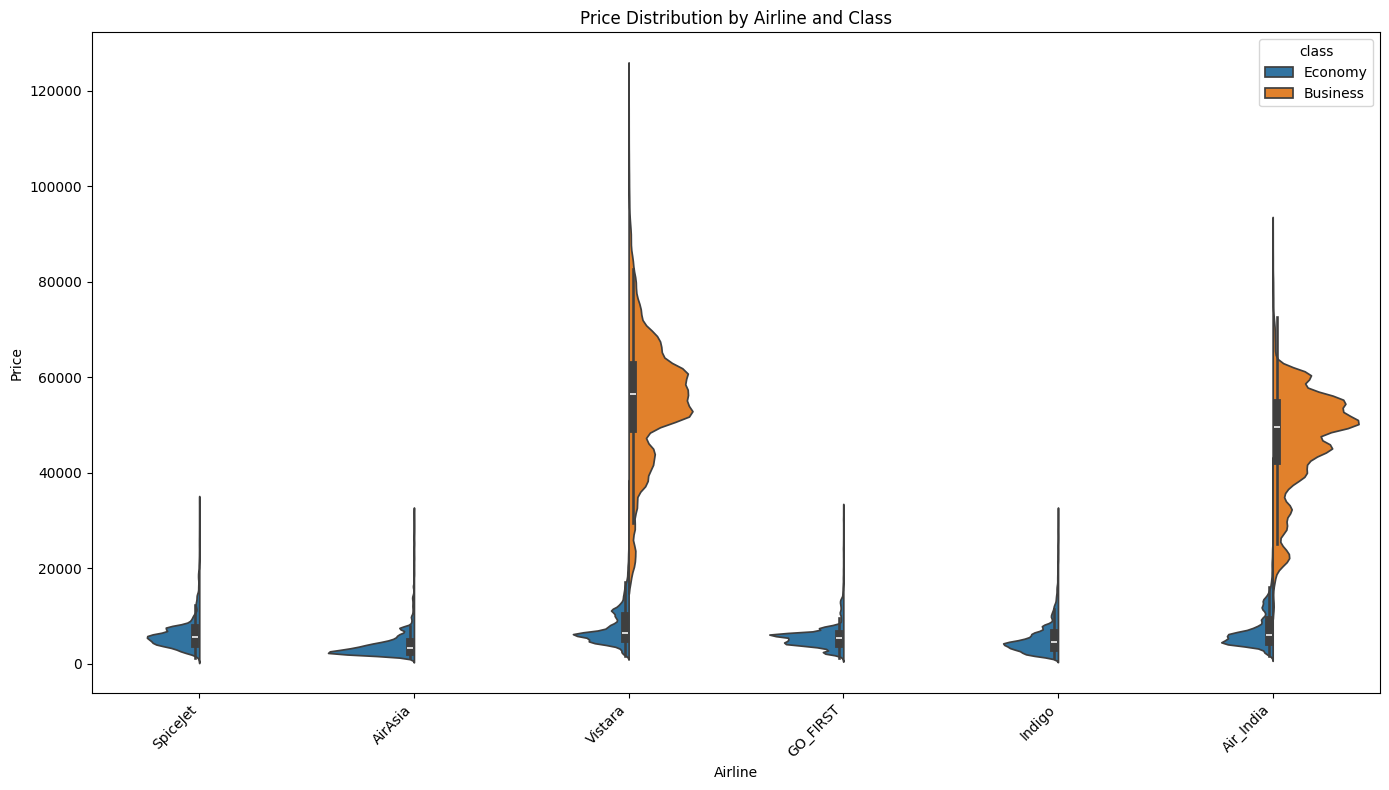

In [67]:
# price Distribution by Airline and Class
plt.figure(figsize=(14, 8))
sns.violinplot(data=df, x='airline', y='price', hue='class', split=True)
plt.title('Price Distribution by Airline and Class')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Machine Learning Model

### 1) List all the Columns :-

In [68]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

### 2) Importing Required Libraries :- 

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error , accuracy_score

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

### 3) Loading the Data into the DataFrame :-

In [70]:
df_ml = pd.read_csv("airlines_flights_data.csv")
df_ml

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


### 2. Drop rows with missing target or features :-

In [71]:
df_ml = df_ml.dropna(subset=['price'])

### 3) Encode Categorical variables :-

In [72]:
df_ml = df_ml.copy()
label_encoders = {}
for col in df_ml.select_dtypes(include=['object', 'category']):
    le = LabelEncoder()
    df_ml[col] = le.fit_transform(df_ml[col].astype(str))
    label_encoders[col] = le


### 4) Define features and target :-

In [73]:
X = df_ml.drop(['price'], axis=1)
y = df_ml['price']

### 5) Splitting the Data into train_test :-

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 6) Scale Features :-

In [75]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 7) Define models :-|

In [76]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

### 8) Train , predict & evaluate :- 

In [77]:
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n{name} Results:")
    print("R² Score:", round(r2_score(y_test, preds), 4))
    print("MAE:", round(mean_absolute_error(y_test, preds), 2))
    print("RMSE:", round(np.sqrt(mean_squared_error(y_test, preds)), 2))


LinearRegression Results:
R² Score: 0.9046
MAE: 4622.93
RMSE: 7012.68

Ridge Results:
R² Score: 0.9046
MAE: 4622.94
RMSE: 7012.68

RandomForest Results:
R² Score: 0.9911
MAE: 771.08
RMSE: 2137.66

XGBoost Results:
R² Score: 0.9839
MAE: 1574.96
RMSE: 2876.68


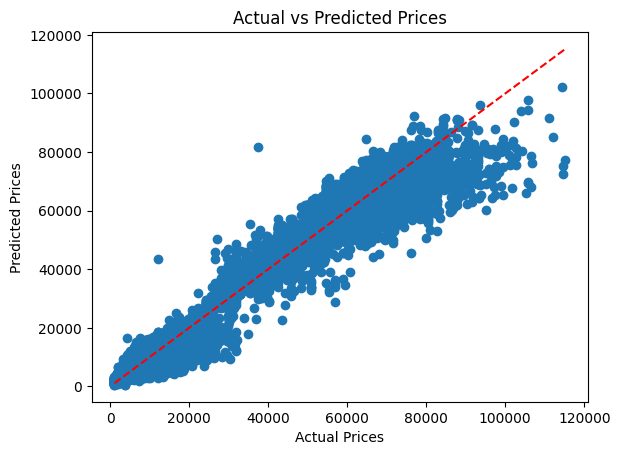

In [78]:
# Scatterplot for Actual vs Predicted Prices
plt.scatter(y_test, preds)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.show()


We can find there pseudo Accuracy also 

In [79]:
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy = 1 - (mean_absolute_error(y_test, preds) / y_test.mean())
    print("Accuracy (approx):", round(accuracy * 100, 2), "%")

Accuracy (approx): 77.87 %
Accuracy (approx): 77.87 %
Accuracy (approx): 96.31 %
Accuracy (approx): 92.46 %


**🚀 Future Scope**

**1) Prediction Web App**
Integrate the trained model into a web application using frameworks like Flask or Streamlit to allow users to input flight details and get instant price predictions.

**2) Deployment with APIs**
Deploy the model on cloud platforms (like AWS, Heroku, or Render) and expose it through REST APIs for use in real-world applications.

**3) Time Series-Based Forecasting**
Extend the project to include temporal patterns and trends to predict future prices based on booking date, travel seasonality, and demand fluctuations.

**4) Feature Engineering**
Introduce more features like days left until departure, holiday/weekend indicator, or demand index to make the model more robust.

**5) Use of NLP for Airline Reviews**
Incorporate textual review data using Natural Language Processing (NLP) to analyze how customer feedback impacts pricing.

**6) Automation & Continuous Learning**
Use autoML frameworks (like TPOT, AutoGluon) or set up a pipeline for continuous learning with new data over time.

# Thank You